Alisher Tortay


In [2]:
import numpy as np
from sklearn.datasets import load_svmlight_file
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## 1) Linear regression

I added ones in last row of x matrix

In [5]:
x_data, y_data = load_svmlight_file("data1.txt")
x = np.full((x_data.shape[0], x_data.shape[1]+1), 1.0)
y = y_data 
x[:,:-1] = x_data.todense()

Analytical solution from lecture slides

In [6]:
def analytic_sol(x,y):
    x_trans = x.transpose()
    b = np.dot(x_trans,x)
    c = np.dot(x_trans, y)
    return np.linalg.solve(b, c)

L1 prediction error

In [7]:
def testError(x, y, b):
    x1 = x.transpose()
    temp1 = y - np.dot(b, x1)
    temp2 = np.absolute(temp1)
    return np.sum(temp2)/len(y)

Cost function which is basically L2 norm of residuals 

In [8]:
def cost(x, y, b):
    x1 = x.transpose()
    temp1 = y - np.dot(b, x1)
    temp2 = np.square(temp1)
    return np.sum(temp2)/len(y)

This is the main function of first problem. Here program randomly splits dataset 10 times. Each time it solves the optimization problem analytically and computes error and cost. Function returns list of errors and costs. 

In [9]:
def lin1(x, y):
    n = int(x.shape[0])
    k = int(0.8*n)
    eresult = []
    costresult = []
    for j in range(10):
        a = range(n)
        np.random.shuffle(a)
        b = a[:k]
        c = a[k:]
        x_trn = x[b,:]
        x_tst = x[c,:]
        y_trn = y[b]
        y_tst = y[c]
        betta = analytic_sol(x_trn, y_trn)
        eresult.append(testError(x_tst, y_tst, betta))
        costresult.append(cost(x_tst, y_tst, betta))
    return eresult, costresult

main function call

In [10]:
err_lin1, cost_lin1 = lin1(x, y)

Errors of 10 random splits

In [11]:
err_lin1

[3.1539411396244796,
 3.5090972999811592,
 3.5118082351828308,
 3.5138123841010809,
 3.0094599178231851,
 3.9271432756019156,
 3.0027994685076269,
 3.3606422618386027,
 3.2052706108007705,
 3.2605399723907866]

Average error

In [32]:
error_analytic = np.sum(err_lin1)/10
error_analytic

3.3454514565852436

Costs of 10 splits

In [13]:
cost_lin1

[19.596604363746273,
 24.875081560267049,
 24.268789930685703,
 26.234827734061717,
 15.974802516354274,
 36.919026785503867,
 16.951689333799202,
 19.451744725070544,
 19.167977247393488,
 19.750425546746353]

Average cost. Save it for later use in Problem 2

In [14]:
optimal_lin = np.sum(cost_lin1)/10
optimal_lin

22.319096974362846

In this part of homework we can see that analytical solution is fast and effective method to solve this kind of problems. Problem 1 was relatively easy. I spent most of the time on setting up python and getting used to new libraries.

## 2) Linear Regression

Since we are using the same dataset, we'll just keep x and y

Here is my implementation of gradient descent algorithm. After several trials I managed to make it more or less efficient by changing (almost) all python loops to matrix operations. Here I don't use any stopping condition except iterations number

In [15]:
def gradientDescent(alpha, x, y, max_iter=10000):
    m = x.shape[0] # number of samples
    n = x.shape[1] # number of features
    x1 = x.transpose()
    b = np.zeros(n, dtype=np.float64)
    for _ in xrange(max_iter):
        b_temp = np.zeros(n, dtype=np.float64)
        temp = y - np.dot(b, x1)
        for i in range(n):
            b_temp[i] = np.sum(temp * x1[i])
        b_temp *= alpha/m
        b = b + b_temp
    return b

This is the main function of Problem 2. Here program randomly splits dataset 10 times. Each time it performs one gradient descent with step size of 0.1 (best I could find) and with 500 iterations. Then the program computes L1 error and appends it to errors list. It also solves analytically in each step. Moreover, there are 3 "for" loops with 100 iterations each. In each of these inner loops it performs one of three gradient descents with different step sizes andsame iteration number, which equals to 5 * i (i is iteration index of for loop). The program also computes corresponding costs and appends results to lists. Step sizes are: 0.1 (proper), 0.01 (too small), 0.409 (too large). Then I take average of this for loops over 10 splits and draw a plot iterations vs. cost. I also include cost of analytical method from Problem 1.

In [29]:
def lin2(x, y):
    n = int(x.shape[0])
    k = int(0.8*n)
    result = []
    mr1 = []
    mr2 = []
    mr3 = []
    analytical = []
    for j in xrange(10):
        a = range(n)
        np.random.shuffle(a)
        b = a[:k]
        c = a[k:]
        x_trn = x[b,:]
        x_tst = x[c,:]
        y_trn = y[b]
        y_tst = y[c]    
        betta = gradientDescent(0.1, x_trn, y_trn, 500)
        result.append(testError(x_tst, y_tst, betta))
        p = []
        for i in xrange(100):
            bb = gradientDescent(0.1, x_trn, y_trn, 5*i)
            p.append(cost(x_tst, y_tst, bb))
        mr1.append(p)
        r = []
        for i in xrange(100):
            bb = gradientDescent(0.01, x_trn, y_trn, 5*i)
            r.append(cost(x_tst, y_tst, bb))
        mr2.append(r)
        q = []
        for i in xrange(100):
            bb = gradientDescent(0.409, x_trn, y_trn, 5*i)
            q.append(cost(x_tst, y_tst, bb))
        mr3.append(q)
        theta = analytic_sol(x_trn, y_trn)
        analytical.append(cost(x_tst, y_tst, theta))
    res = np.sum(result)/10
    ave1 = np.sum(mr1, axis=0)/10
    ave2 = np.sum(mr2, axis=0)/10
    ave3 = np.sum(mr3, axis=0)/10
    ave4 = np.sum(analytical, axis=0)/10
    t = [5*i for i in xrange(100)]
    analytic = [ave4 for _ in xrange(100)]
    plt.plot(t, analytic, 'r', t, ave2, 'b', t ,ave3, 'g', t, ave1, 'y')
    plt.axis([0, 500, 0, 600])
    plt.ylabel("cost")
    plt.xlabel("iterations")
    plt.show()
    return res

In this graph red line is analytical method. It does not depend on number of iterations. Yellow line is dradient descent with fixed step size of 0.1. Blue and green lines are gradient descents with step sizes 0.01 and 0.409. In case of yellow line we can clearly see that it performs better than blue and green lines. Cost of yellow line dramatically decreases within first 10 iterations. Thus it converges to cost of analytical solution by 100th iteration. Blue line, representing too small step sizes, failed to completely diverge in 500 iterations. It could not reach the optimal value because step size is too small. Green line, representing too lagde step size, diverges as iterations increase. Interestingly, it's cost decreases until 50 iterations and then rockets up with some flactuations. In the beginnig cost decreases because optimal value for theta is far enough. But as we get closer to this method starts to "jump over" optimal theta and then jumps become bigger and bugger until it completely diverges.

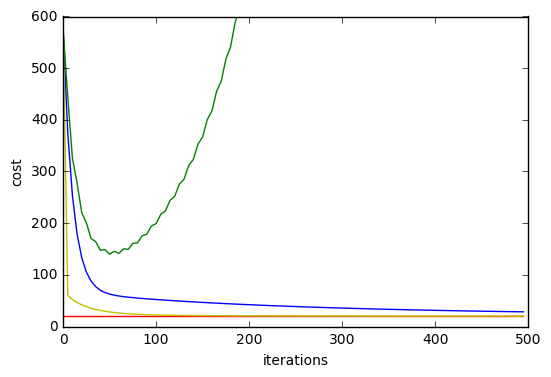

In [30]:
error_gradient = lin2(x, y)

Here error is 3.2280665573708696. It is close to analytic solution it is 3.3454514565852436. The difference can be explained by randomness of splits (since we computed there values in different functions). So we can conclude that gradiend descent performs as well as analytical solution in terms of error. 

In [31]:
error_gradient

3.2280665573708696

## 3) Logistic Regression

In [22]:
x_data, y_data = load_svmlight_file("data2.txt")
x = np.ones((x_data.shape[0], x_data.shape[1]+1))
x[:,:-1] = x_data.todense()
y = y_data

Sigmoid functions for vector inputs

In [23]:
def sigmoid(x):
    temp1 = np.exp(x * -1)
    temp2 = np.ones(len(x))
    return np.divide(temp2,temp2 + temp1)

Hypothesis function for vector and matrix inputs. It assumes that x is already transposed.

In [24]:
def hypo(b, x):
    # x is transposed
    t0 = np.dot(b, x)
    return sigmoid(t0)

Log likelihood function. We will maximize this function or minimize negative this number. x here is matrix.

In [25]:
def loglikelihood(x, y, b):
    x1 = x.transpose()
    temp1 = hypo(b, x1)
    temp2 = y * np.log(temp1) + (1 - y) * np.log(1 - temp1)
    return np.sum(temp2)/len(y)

This gradient descent function minimizes our objective function (-loglikelihood). It uses fized step size. No stopping condition except iteration number

In [26]:
def logGradientDescent(alpha, x, y, max_iter=100):
    m = x.shape[0] # number of samples
    n = x.shape[1] # number of features
    x1 = x.transpose()
    b = np.zeros(n)
    for _ in xrange(max_iter):
        b_temp = np.zeros(n, dtype=np.float64)
        temp = y - hypo(b, x1)
        for i in range(n):
            b_temp[i] = np.sum(temp * x1[i])
        b_temp *= alpha/m
        b = b + b_temp
    return b

This is similar gradient descent function with backtracking linear search. I used minus gradient of objective function as a direction. -1 is because objective function is negative of loglikelihood. I use standard algorith for backtracking linear search found in Wikipedia. No stopping condition except iteration number.

In [27]:
def logGradientDescentBack(x, y, alpha, betta, max_iter=100):
    m = x.shape[0] # number of samples
    n = x.shape[1] # number of features
    x1 = x.transpose()
    b = np.zeros(n)
    for _ in xrange(max_iter):
        b_temp = np.zeros(n, dtype=np.float64)
        temp = y - hypo(b, x1)
        for i in range(n):
            b_temp[i] = np.sum(temp * x1[i])
        b_temp /= m
        p = np.divide(b_temp, np.linalg.norm(b_temp))
        grad = b_temp * (-1)
        fx = loglikelihood(x, y, b)
        step = 1
        while (-1*loglikelihood(x, y, b + step * p) > (-1*fx + alpha * step * np.dot(grad, p))):
            step *= betta
        b_temp *= step
        b = b + b_temp
    return b

This functions predicts value of y based on x and b (theta). Basically it computes hypothesis and compares with 0.5. If greater than 0.5 it predicts 1 other wise 0.

In [28]:
def predict(x, b):
    m = x.shape[0] # number of test samples
    x1 = x.transpose()
    y = np.zeros(m, dtype=np.float64)
    prob = hypo(b, x1)
    for i in xrange(m):
        if (prob[i] > 0.5):
            y[i] = 1.0
    return y

This function computes error rate of our hypothesis.

In [32]:
def predError(x, y, b):
    y1 = predict(x, b)
    return np.sum(np.absolute(y1 - y))/len(y)

This is the main function of Problem 3. As before the program splits the dataset randomnly into training and test sets 10 times. Each time it runs while loop similar to lin2 function. Inside of this inner loop we perform both gradient descent with fixed step and with backtracking line search. We save loglikelihoods of these function. In each of 10 times we also compute prediction error for both cases and return them. Then it averages likelihoods from inner loop over 10 times and plots a graph.  

In [33]:
def analyze(x, y, fixed_step = 0.4, alpha = 0.5, betta = 0.1, iters = 500, repeat = 10):
    n = int(x.shape[0])
    k = int(0.8*n)
    delta = iters/50
    error_fixed = []
    error_back = []
    loglike_fixed = []
    loglike_back = []
    for j in xrange(repeat):
        a = range(n)
        np.random.shuffle(a)
        b = a[:k]
        c = a[k:]
        x_trn = x[b,:]
        x_tst = x[c,:]
        y_trn = y[b]
        y_tst = y[c]
        temp_f = []
        temp_b = []
        k = 0
        while (k <= iters):
            theta_fixed = logGradientDescent(fixed_step, x_trn, y_trn, k)
            theta_back = logGradientDescentBack(x_trn, y_trn, alpha, betta, k)
            temp_f.append(loglikelihood(x_tst, y_tst, theta_fixed))
            temp_b.append(loglikelihood(x_tst, y_tst, theta_back))
            k += delta
        error_fixed.append(predError(x_tst, y_tst, theta_fixed))
        error_back.append(predError(x_tst, y_tst, theta_back))
        loglike_fixed.append(temp_f)
        loglike_back.append(temp_b)
    ave_fixed = np.sum(loglike_fixed, axis=0)/repeat
    ave_back = np.sum(loglike_back, axis=0)/repeat
    t = np.arange(0, iters+1, delta)
    plt.plot(t, ave_fixed, 'r', t, ave_back, 'b')
    plt.ylabel("cost")
    plt.xlabel("iterations")
    plt.show()
    return error_fixed, error_back

Here is the graph. Red is GD (gradient descent) with fixed step size and blue is GD with backtracking line search. Here our goal to maximize loglikelihood. We can see that in first 10 iterations fixed step size perform better (probably because of good choice of step size). However by 20th iteration backtracking line search hits the optimal value. Fixed step hits the sam value only after 150 iterations. Interesting feature is that backtracking line search (BLS) starts to give worse results after around 70th iterations. This is because of overfitting. One way to avoid it is to add additional stopping condition to GD with BLS such as stop when difference of consecutive objective functions is insignificant. In this case BLS converges much faster. However we still spend some time on line search every iteration.

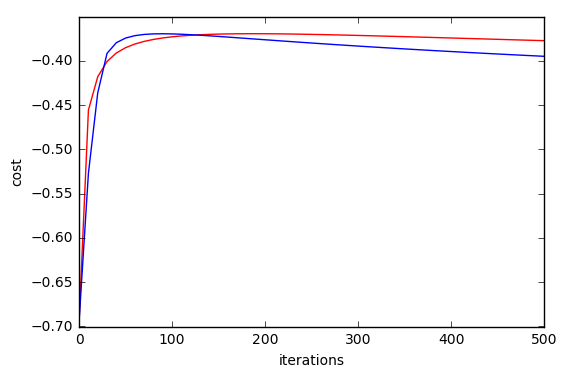

In [41]:
error_fixed, error_back = analyze(x, y, repeat=10)

In [37]:
error_fixed

[0.18681318681318682,
 0.1730841121495327,
 0.17233644859813085,
 0.17682242990654207,
 0.18205607476635513,
 0.17794392523364486,
 0.17943925233644858,
 0.16971962616822431,
 0.17532710280373831,
 0.17532710280373831]

In [38]:
np.sum(error_fixed)/10

0.17688692615795415

In [39]:
error_back

[0.18053375196232338,
 0.16897196261682243,
 0.17457943925233646,
 0.17943925233644858,
 0.18654205607476634,
 0.18168224299065422,
 0.18093457943925234,
 0.17196261682242991,
 0.18242990654205607,
 0.17981308411214952]

In [40]:
np.sum(error_back)/10

0.17868888921492393

Here we can see that erro of BLS is greater than that of fixed step. I already explained this in graph. 

It was difficult homework because we haven't covered any implementations of ML algorithms before. However it was very interesting to implement them myself. It took a lot of time to start homework because of setting up and getting used to environment and libraries. This homework helped me understand concepts we covered in class better.